# <center> El método de los mínimos cuadrados </center>
## <center> Las canciones más vistas en Youtube (2017) </center>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

from matplotlib.ticker import FormatStrFormatter

# Obtenemos las rutas de los estilos de texto
fm.findSystemFonts(fontpaths=None, fontext="ttf")


In [12]:
# Usamos Pandas para definir la tabla de datos de las canciones más vistas en Youtube

date = pd.date_range("20170704", periods=6)
set = {
    "x": [4,5,6,7,8,9],
    "Gangnam Style": [2886.5,2887.5,2888.5,2889.5,2890.6,2891.6],
    "See You Again": [2872.8,2875.9,2879,2882.2,2885.7,2889], 
    "Sorry": [2628.8,2630.9,2633,2635.1,2637.4,2639.6],
    "Uptown Funk": [2532,2534.1,2536.3,2538.5,2540.8,2543],
    "Despacito": [2310,2328,2348,2369,2393,2415]
}
song = pd.DataFrame(set, index=date)

from IPython.display import HTML, display_html, display
display(HTML('<h3>Número de vistas en Youtube (millones)</h3>'))
display_html(song)

,x,Gangnam Style,See You Again,Sorry,Uptown Funk,Despacito
2017-07-04,4,2886.5,2872.8,2628.8,2532.0,2310
2017-07-05,5,2887.5,2875.9,2630.9,2534.1,2328
2017-07-06,6,2888.5,2879.0,2633.0,2536.3,2348
2017-07-07,7,2889.5,2882.2,2635.1,2538.5,2369
2017-07-08,8,2890.6,2885.7,2637.4,2540.8,2393
2017-07-09,9,2891.6,2889.0,2639.6,2543.0,2415


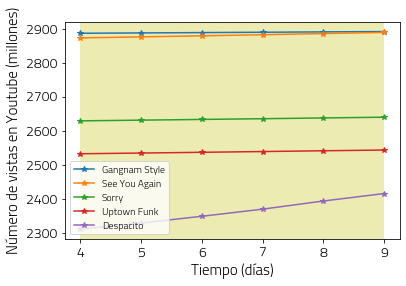

In [3]:
# Graficamos el número de vistas vs tiempo

# Cada usuario debe elegir su propia ruta de estilo de texto
pathttf = 'C:\\Users\\copro\\AppData\\Local\\Microsoft\\Windows\\Fonts\\TitilliumWeb-Light.ttf'
titillium    = fm.FontProperties(fname= pathttf)

Fig1 = song.plot(x = 'x',marker='*')
Fig1.set_ylabel("Número de vistas en Youtube (millones)",fontproperties=titillium, size=15)
Fig1.set_xlabel("Tiempo (días)", fontproperties=titillium, size=15)

boxdata =Fig1.legend()
plt.setp(boxdata.texts, fontproperties=titillium)

Fig1.set_xticklabels(Fig1.get_xticks(), fontproperties=titillium, size=14)
Fig1.set_yticklabels(Fig1.get_yticks(), fontproperties=titillium, size=14)
Fig1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
Fig1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.axvspan(4, 9, color='y', alpha=0.3, lw=0)
plt.savefig("despacitodata.svg")

### Las ecuaciones derivadas en el artículo:
(ver artículo: http://www.nepy.pe/es/tutorial/el-metodo-de-los-minimos-cuadrados)

La ecuación de la recta es: $y = m x + b$, con
$$ m = \frac{n\sum_i^n y_i x_i - \sum_i^n y_i \sum_i^n x_i}{n\sum_i^n x_i^2 - (\sum_i^n x_i)^2},$$
$$ b = \frac{\sum_i^n y_i \sum_i^n x_i^2 - \sum_i^n y_i x_i \sum_i^n x_i}{n\sum_i^n x_i^2 - (\sum_i^n x_i)^2}.$$

Considerando las siguientes relaciones:

$$ S_x = \sum_i^n x_i, $$
$$ S_{xx} = \sum_i^n x_i^2, $$
$$ S_y = \sum_i^n y_i, $$
$$ S_{yx} = \sum_i^n y_i x_i. $$

Las expresiones se reducen a:

$$ m = \frac{n S_{yx} - S_y S_x}{n S_{xx} - (S_x)^2},$$
$$ b = \frac{S_y S_{xx} - S_{yx} S_x}{n S_{xx} - (S_x)^2}.$$

Entonces tenemos,

In [4]:
# Definimos los parámetros de m y b en forma vectorial

cancion = song.to_numpy()
Sx  = np.sum(cancion[:,0])
Sxx = np.sum(np.power(cancion[:,0] ,2))
Sy  = np.sum(cancion[:,1:6] ,axis=0)
Syx = np.sum(cancion[:,1:6] * cancion[:,0].reshape((len(cancion),1)) ,axis=0)
n   = len(cancion[:,0])

m = (n*Syx - Sy*Sx)/(n*Sxx - Sx*Sx)
b = (Sy * Sxx - Syx * Sx)/(n*Sxx - Sx*Sx)

In [5]:
# Definimos las ecuaciones de las rectas en forma vectorial

points = 51
y= np.zeros((points,len(cancion)-1))
x= np.zeros((points,1))
for i in range(0,points):
    x[i] = i           # x.shape = (51,1)
    y[i,:] = m*i + b   # y.shape = (51,5)

# y[:,0] => Gangnam Style, y[:,1] => See You Again, y[:,2] => Sorry, y[:,3] => Uptown Funk, y[:,4] => Despacito. 

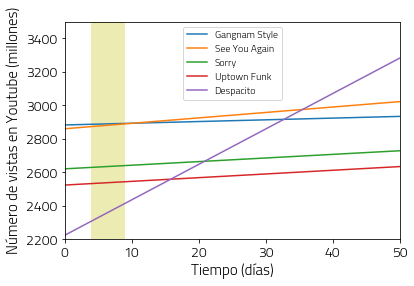

In [6]:
# Graficamos las ecuaciones de las rectas

xmin=0
xmax=50
ymin=2200
ymax=3500

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set_ylabel("Número de vistas en Youtube (millones)", fontproperties=titillium, size=15)
ax.set_xlabel("Tiempo (días)", fontproperties=titillium, size=15);

boxline = ax.legend(['Gangnam Style','See You Again','Sorry','Uptown Funk','Despacito'])
plt.setp(boxline.texts, fontproperties=titillium)

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_xticklabels(ax.get_xticks(), fontproperties=titillium, size=14)
ax.set_yticklabels(ax.get_yticks(), fontproperties=titillium, size=14)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.axvspan(4, 9, color='y', alpha=0.3, lw=0)
plt.savefig("despacitoline.svg")

# ¿En qué momento See You Again supera a Gangnam Style?

Las ecuaciones de la rectas de Gangnam Style ($g$) y See You Again ($s$) son:

$$y_{g} = m_{g} x + b_{g},$$
$$y_{s} = m_{s} x + b_{s}.$$

See You Again alcanza (y por ende supera) a Gangnam Style justo cuando las rectas se cruzan, i.e.,

$$x = \frac{b_{g} - b_{s}}{m_{s} - m_{g}}.$$

In [7]:
(b[0]-b[1])/(m[1]-m[0])

10.218937446442368

**- El 10 de julio, See You Again alcanza y supera a Gangnam Style.**

# ¿En qué momento Despacito supera a las demás canciones?
Realizamos un procedimiento similar al anterior:


In [8]:
# j=0 is Gangnam Style, j=1 is See You Again, j=2 is Sorry, and j=3 is Uptown Funk
dates=[]
for j in range(0,4): 
    dates.append((b[j]-b[4])/(m[4]-m[j]))
print(dates)

[32.731801852901, 35.523483158003984, 20.893096884078428, 15.831399728793286]


**- El 15 de julio supera a Uptown Funk.**

**- El 20 de julio supera a Sorry.**

**- El 32 de julio (1 de agosto) supera a Gangnam Style.**

**- El 35 de julio (4 de agosto) supera a Gangnam Style.**


# ¿En qué momento Despacito alcanza 3 mil millones de vistas?
Las ecuación de la recta de Despacito ($d$) es:

$$y_{d} = m_{d} x + b_{d}.$$

Para entender en que momento alcanza 3 mil millones, definimos:

$$\frac{3000- b_{d}}{m_{d}} = x.$$

In [9]:
(3000 - b[4]) / m[4]

36.705802968960874

**- El 36 de julio (5 de agosto) Despacito supera 3000 millones de vistas en Youtube.**
